# Занятие 11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Можно задать своё дискретное распределение
Для этого нужно задать множество значений и соответсвующих вероятностей

In [2]:
elements = np.array([1,5,12])
probabilities = [0.2, 0.45, 0.35]

np.random.choice(elements, 10, p=probabilities)

array([ 1,  5,  5, 12,  5,  5,  1,  5,  5, 12])

In [3]:
a = {"sing":"plus"}
elements = ["a", (2,4), a]
probabilities = [0.2, 0.45, 0.35]

np.random.choice(elements, 10, p=probabilities)

array([(2, 4), (2, 4), {'sing': 'plus'}, {'sing': 'plus'}, (2, 4), (2, 4),
       (2, 4), {'sing': 'plus'}, {'sing': 'plus'}, 'a'], dtype=object)

## События  
### Вложенность  A&subseteq;B
событие A вложено в событие B  

In [4]:
B = np.random.choice(range(10), 10)
print(f'"B="{B}')
A = np.random.choice(range(3,7), 5)
print(f'"A="{A}')

"B="[6 5 6 5 0 6 5 7 0 3]
"A="[6 5 4 5 5]


### Сумма и произведение событий
AB – произведение

A + B – сумма

In [5]:
A = np.random.choice(range(4,27), 15)
print(f'"A="{A}')
B = np.random.choice(range(10), 10)
print(f'"B="{B}')

print(f'"Сумма AB"{A.tolist() + B.tolist()}')
print(f'"Произведение AB"{[a for a in A if a in B] + [b for b in B if b in A]}')


"A="[ 7 23 10  9 14 10 18  7 20 21 14 13  6 20  5]
"B="[0 0 1 1 3 8 8 6 3 2]
"Сумма AB"[7, 23, 10, 9, 14, 10, 18, 7, 20, 21, 14, 13, 6, 20, 5, 0, 0, 1, 1, 3, 8, 8, 6, 3, 2]
"Произведение AB"[6, 6]


## Дополнение
B \ A – происходит событие B, но не происходит событие A

In [6]:
print(f'"Дополнение AB"{[b for b in B if b not in A]}')

"Дополнение AB"[0, 0, 1, 1, 3, 8, 8, 3, 2]


## Формула полной вероятности
#### Задача
_Имеются три одинаковые урны. В первой урне находятся 4 белых и 7 черных шаров, во второй – только белые и в третьей – только черные шары. Наудачу выбирается одна урна и из неё наугад извлекается шар. Какова вероятность того, что этот шар чёрный?_
#### Решение: 
рассмотрим событие \\(A\\) – из наугад выбранной урны будет извлечён чёрный шар.  Данное событие может произойти или не произойти в результате осуществления одной из следующих гипотез:

\\(B_1\\) – будет выбрана 1-я урна;

\\(B_2\\) – будет выбрана 2-я урна;

\\(B_3\\) – будет выбрана 3-я урна.

Так как урна выбирается наугад, то выбор любой из трёх урн равновозможен, следовательно:

$$P(B_1)=P(B_2)=P(B_3)=\frac{1}{3}$$

Обратите внимание, что перечисленные гипотезы образуют полную группу событий, то есть, по условию чёрный шар может появиться только из этих урн, а например, не прилететь с бильярдного стола. Проведём простую промежуточную проверку:
$$P(B_1)+P(B_2)+P(B_3)=\frac{1}{3}+\frac{1}{3}+\frac{1}{3}=1$$
ОК, едем дальше:

В первой урне 4 белых + 7 черных = 11 шаров, по классическому определению:
\\(P_{B_1}(A)=\frac{7}{11} \\) – вероятность извлечения чёрного шара при условии, что будет выбрана 1-я урна.

Во второй урне только белые шары, поэтому в случае её выбора появление чёрного шара становится невозможным: \\(P_{B_2}(A)=0\\).

И, наконец, в третьей урне одни чёрные шары, а значит, соответствующая условная вероятность извлечения чёрного шара составит \\(P_{B_3}(A)=1\\) (событие достоверно).

По формуле полной вероятности:
$$P(A)=P(B_1)*P_{B_1}(A)+P(B_2)*P_{B_2}(A)+ P(B_3)*P_{B_3}(A)=\frac{1}{3}*\frac{7}{11}+\frac{1}{3}*0+\frac{1}{3}*1=\frac{18}{33}=\frac{6}{11}$$

 – вероятность того, что из наугад выбранной урны будет извлечен чёрный шар.

#### Ответ: 
$$\frac{6}{11}\   или   \ 0.545454...$$

#### Сложно? ... можно и изящней

In [7]:
# заполняем урну B1
B1 = ["white"]*4 + ['black']*7
# просто использовать B2="white" некорректно, т.к. по процессу выбирается шар из неизвестного числа шаров в урне
# предпожим, что в урне до 11 шаров (как и в урне B1)
B2 = ["white"]*random.choice(range(1,12)) 
# B3="black" некорректно, т.к. по процессу выбирается шар из неизвестного числа шаров в урне
# предпожим, что в урне до 11 шаров (как и в урне B1)
B3 = ["black"]*random.choice(range(1,12))

# задаем число экспериментов
n = 100000
# формируем выборку
A = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(B1),
                           random.choice(B2),
                           random.choice(B3)
                           ]), range(n)
                              ))
                 })
# считаем статистику выпадений черных шаров
P_black = len(A[A.A=='black'])/A.shape[0]
P_black

0.54278

### Формула Байеса
##### Задача
Имеются три урны; в первой 3 белых шара и 1 чёрный, во второй - 2 белых шара и 3 чёрных, в третьей - три белых шара. Некто подходит наугад к одной из урн и вынимает из неё один шар. Этот шар оказался белым. Найти послеопытные (апостериорные) вероятности того, что этот шар вынут из первой, второй, третьей урны.

##### Решение. 
Гипотезы:

\\(B_1\\) – будет выбрана 1-я урна;

\\(B_2\\) – будет выбрана 2-я урна;

\\(B_3\\) – будет выбрана 3-я урна.

Так как урна выбирается наугад, то априорные вероятности гипотез раны:

$$P(B_1)=P(B_2)=P(B_3)=\frac{1}{3}$$

В результате опыта появилось событие \\(A\\) - из выбранной урны вынут белый шар.

Условные вероятности события \\(A\\) относительно каждой из гипотез:

\\(P(A|B_1)=\frac{3}{4}\\),
\\(P(A|B_2)=\frac{2}{5}\\), 
\\(P(A|B_3)=1\\).

##### Ответ
Применяя формулу Байеса, находим апостериорные вероятности гипотез:

\\(P(A|B_1)=\frac{\frac{1}{3}*\frac{1}{4}}{\frac{1}{3}*\frac{4}{4}+\frac{1}{3}*\frac{2}{5}+\frac{1}{3}*1}=\frac{15}{43}\\),

\\(P(A|B_2)=\frac{\frac{1}{3}*\frac{2}{5}}{\frac{1}{3}*\frac{4}{4}+\frac{1}{3}*\frac{2}{5}+\frac{1}{3}*1}=\frac{8}{43}\\), 

\\(P(A|B_3)=\frac{\frac{1}{3}*1}{\frac{1}{3}*\frac{4}{4}+\frac{1}{3}*\frac{2}{5}+\frac{1}{3}*1}=\frac{20}{43}\\).

$$Python?$$

In [8]:
# немного упростим - введем функцию наполнения урн
def fill_urn (n_white, n_black=0):
    return ["white"]*n_white + ['black']*n_black
# заполняем урну B1
B1 = fill_urn(n_white = 3,n_black=1)
# заполняем урну B2
B2 = fill_urn(2,3)
# заполняем урну B3
B3 = fill_urn(3)

# задаем число экспериментов
n = 100000
# формируем выборку
# счетчик выпадений белого по урнам
A = {'B1':0, 'B2':0,'B3':0}
# словарь соответсвий имен и урн
B = {'B1':B1, 'B2':B2,'B3':B3}

# генерируем выборку
for i in range(n):
    #подходим к урне
    b = random.choice(['B1', 'B2', 'B3'])
    #выбираем шар
    ball = random.choice(B[b])
    #запоминаем из какой урны белый шар
    if ball == 'white':
        A.update({b:A[b]+1})  
        
# считаем статистику выпадений белых шаров (используем число выпадений белого!)
print (f'P(A|B1)={A["B1"]/sum(A.values())}\t{15/43}')
print (f'P(A|B2)={A["B2"]/sum(A.values())}\t{8/43}')
print (f'P(A|B3)={A["B3"]/sum(A.values())}\t{20/43}')

P(A|B1)=0.34898982861920025	0.3488372093023256
P(A|B2)=0.1866100041800195	0.18604651162790697
P(A|B3)=0.46440016720078026	0.46511627906976744


## Дискретные случайные величины

### Распределение Бернулли

In [9]:
bernoulli_rv = sts.bernoulli(0.7) # задаётся один параметр -- вероятность успеха

bernoulli_rv.rvs(10)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

[]

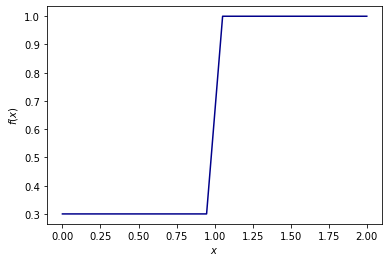

In [10]:
x = np.linspace(0,2,20)
cdf = bernoulli_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Функция вероятности pmf для дискретных случайных величин 

[]

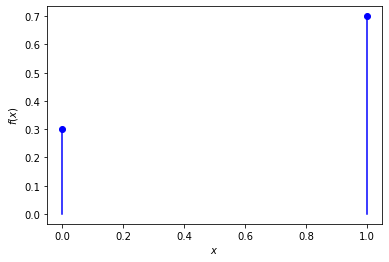

In [11]:
x = np.linspace(0,1,2)
pmf = bernoulli_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pmf, color="blue" )
plt.plot((0,0), (0,bernoulli_rv.pmf(0)), color="blue")
plt.plot((1,1), (0,bernoulli_rv.pmf(1)), color="blue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

### Биномиальное распределение
Кол-во успехов в серии n независимых испытаний бернулли

In [12]:
binomial_rv = sts.binom(20, 0.4) # 20 испытаний с вероятностью успеха 0.4

binomial_rv.rvs(10)

array([ 7,  8, 10, 10, 11,  8,  7,  6,  8, 10])

[]

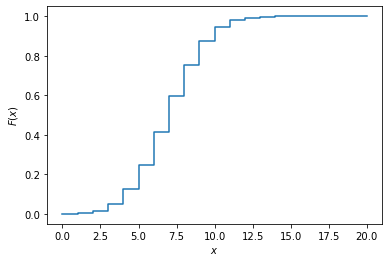

In [13]:
# построим функцию распределения
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x) # вернёт массив из значений функции распределения
plt.step(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

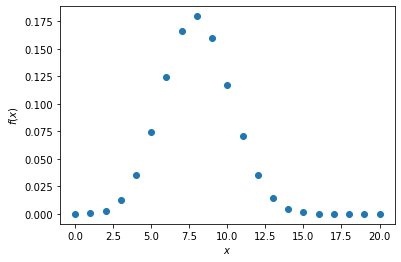

In [14]:
x = np.linspace(0,20,21)
pdf = binomial_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Посмотрим как ведут себя биномиально распределенные величины при разных значениях параметров

[]

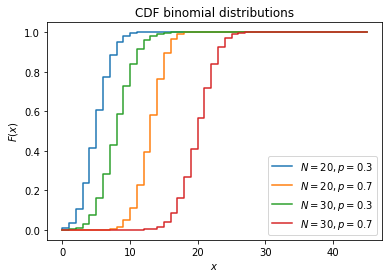

In [15]:
x = np.linspace(0,45,46)
for N in [20,30]:
    for p in [0.3, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))

plt.legend()
plt.title("CDF binomial distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

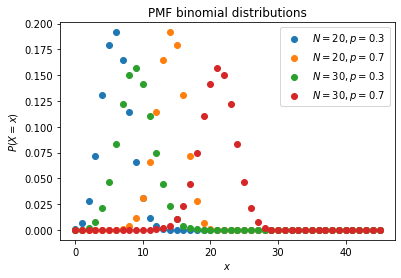

In [16]:
x = np.linspace(0,45,46)
for N in [20,30]:
    for p in [0.3, 0.7]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.scatter(x, pmf, label="$N=%s, p=%s$" % (N,p))

plt.legend()
plt.title("PMF binomial distributions")
plt.ylabel("$P(X=x)$")
plt.xlabel("$x$")
plt.plot()

### Распределение Пуассона

In [17]:
poisson_rv = sts.poisson(5.1) # интенсивность 5
poisson_rv.rvs(10)

array([11,  3,  8,  6,  5,  5,  7,  6,  4, 10])

[]

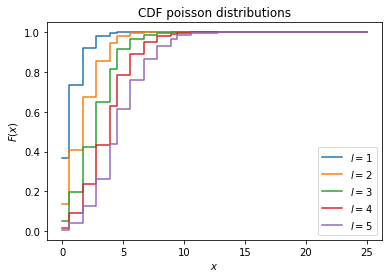

In [18]:
x = np.linspace(0,25,46)
for l in [1,2,3,4,5]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$l=%s$" % l)

plt.legend()
plt.title("CDF poisson distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

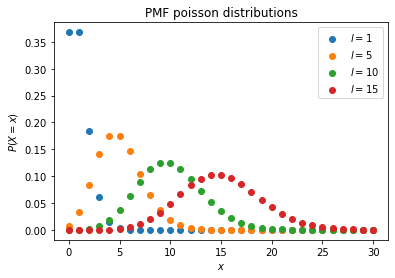

In [19]:
x = np.linspace(0,30,31)
for l in [1,5,10,15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.scatter(x, pmf, label="$l=%s$" % l)

plt.legend()
plt.title("PMF poisson distributions")
plt.ylabel("$P(X=x)$")
plt.xlabel("$x$")
plt.plot()

## Непрерывные случайные величины

### Равномерное распределение на отрезке

In [20]:
a = 1
b = 4

uniform_rv = sts.uniform(a, b-a) # левая граница, и размер отрезка

uniform_rv.rvs(10)

array([2.46195821, 3.9682007 , 2.57383376, 3.39922948, 3.46501022,
       3.11345965, 1.519218  , 2.35289446, 3.15865602, 3.93954232])

[]

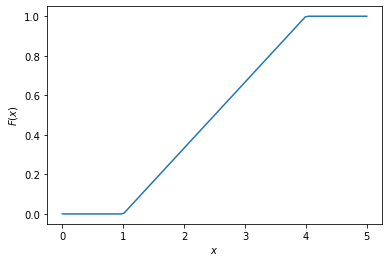

In [21]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

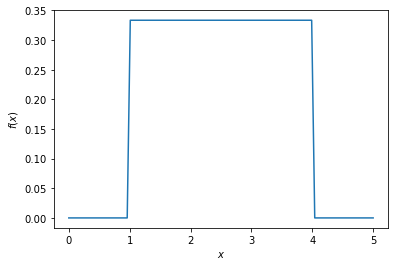

In [22]:
x = np.linspace(0,5,100)
pdf = uniform_rv.pdf(x) # вернёт массив из значений функции распределения
plt.plot(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

### Нормальное распределение

In [23]:
mu = 1
sigma = 4

norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерировать 10 значений 
norm_rv.rvs(size=10)

array([-5.61604995,  3.34441812,  7.83947205,  5.29022398,  4.05370585,
        2.98696802,  3.40553137, -2.71124074,  3.15344806, -2.28465758])

In [24]:
# loc задаёт сдвиг (мат ожидание), scale - масштаб (среднеквадратичное отклонение), size - размер выборки

In [25]:
# вернём значение функции распределения нормальной случайной величины в точке
norm_rv.cdf(2) # вероятность того, что случайная величина будет меньше либо равна переданного значения

0.5987063256829237

[]

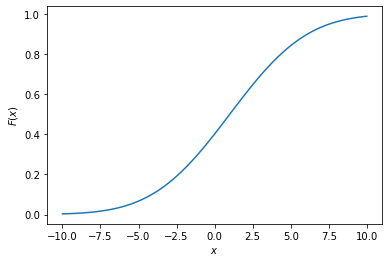

In [26]:
# построим график функции распределения
x = np.linspace(-10,10,100)
cdf = norm_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

In [27]:
# возьмём теперь значение функции плотности вероятности в точке
norm_rv.pdf(2)

0.09666702920071232

[]

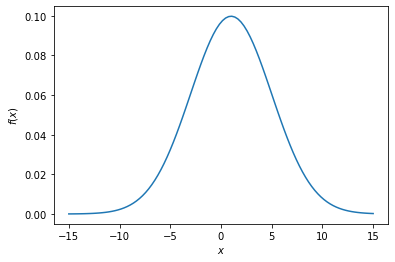

In [28]:
# построим плотность вероятности
x = np.linspace(-15,15,100)
pdf = norm_rv.pdf(x) # вернёт массив из значений функции распределения
plt.plot(x, pdf)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

## список доступных распределений https://docs.scipy.org/doc/scipy/reference/stats.html